<h1>Determine similar neighborhoods from New York and Toronto</h1>

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction <a name="introduction"></a>
Toronto and New York are both financial capitals in their respective countries. Many people travel between Toronto and New York often for business and family purposes. There are also many technology and software companies that have offices in both cities. For people who need to travel between these two cities, how should they decide which neighborhood of the city they should stay in? There are many studies and data that report different attributes of neighborhoods in each city but there are very few studies that show the similarity between Toronto and New York. The purpose of this study is to find out what neighborhoods are similar in Toronto and New York based on the types of venues around the neighborhoods.

## Data <a name="data"></a>

In order to analyze the similarity among all the neighborhoods in Toronto and New York, Foursquare Location data will be used to provide venues information in each cities by their neighborhoods. The data of neighborhoodsToronto neighborhoods coordinates is obtained from Wikipedia and the data of New York neighborhoods is obtained from NYU Spatial Data Repository.

The neighborhoods data will have the Neighborhood Names, postal codes and their Latitudes and Longitudes.

The venues data will contain Venues Names, Venues Category and their Latitudes and Longitudes.

**Toronto Neighborhoods Data**

We will form the Toronto neighborhoods data from the table on wikipedia page: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M 

We will perform basic data cleaning by removing any Null values and grouping the neighborhoods by Borough 

In [47]:
import pandas as pd
import numpy as np
raw_wiki = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
wiki = pd.DataFrame(raw_wiki[0])
wiki.drop(wiki[wiki['Borough'] == 'Not assigned'].index, inplace=True)
wiki.rename(columns = {'Postal Code': 'PostalCode'}, inplace=True)
trt_neighborhoods = wiki.groupby('Borough').agg({'Neighborhood':', '.join}).reset_index()

In [48]:
trt_neighborhoods.head()

,Borough,Neighborhood
0,Central Toronto,"Lawrence Park, Roselawn, Davisville North, For..."
1,Downtown Toronto,"Regent Park, Harbourfront, Queen's Park, Ontar..."
2,East Toronto,"The Beaches, The Danforth West, Riverdale, Ind..."
3,East York,"Parkview Hill, Woodbine Gardens, Woodbine Heig..."
4,Etobicoke,"Islington Avenue, Humber Valley Village, West ..."


Next we will add coordinates to each set of Neighborhoods

In [50]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [51]:
Latitude = []
Longitude = []
geolocator = Nominatim(user_agent="ny_explorer")
for b in trt_neighborhoods['Borough']:
    address = b + ", Toronto"
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)

    
trt_neighborhoods['Latitude'] = Latitude
trt_neighborhoods['Longitude'] = Longitude
trt_neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Central Toronto,"Lawrence Park, Roselawn, Davisville North, For...",43.653482,-79.383935
1,Downtown Toronto,"Regent Park, Harbourfront, Queen's Park, Ontar...",43.654174,-79.380812
2,East Toronto,"The Beaches, The Danforth West, Riverdale, Ind...",43.653482,-79.383935
3,East York,"Parkview Hill, Woodbine Gardens, Woodbine Heig...",43.699971,-79.332520
4,Etobicoke,"Islington Avenue, Humber Valley Village, West ...",43.643556,-79.565633
5,Mississauga,Canada Post Gateway Processing Centre,43.678524,-79.629129
6,North York,"Parkwoods, Victoria Village, Lawrence Manor, L...",43.754326,-79.449117
7,Scarborough,"Malvern, Rouge, Rouge Hill, Port Union, Highla...",43.773077,-79.257774
8,West Toronto,"Dufferin, Dovercourt Village, Little Portugal,...",43.653482,-79.383935
9,York,"Humewood-Cedarvale, Caledonia-Fairbanks, Del R...",43.689619,-79.479188


**New York Neighborhoods Data**

Now we need to perform the steps on data of neighborhoods in New York 

In [10]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset

In [13]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
neighborhoods_data = newyork_data['features']

In [14]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Merge neighborhoods by Borough


In [25]:
ny_neighborhoods = neighborhoods.groupby('Borough').agg({'Neighborhood':', '.join}).reset_index()
ny_neighborhoods

,Borough,Neighborhood
0,Bronx,"Wakefield, Co-op City, Eastchester, Fieldston,..."
1,Brooklyn,"Bay Ridge, Bensonhurst, Sunset Park, Greenpoin..."
2,Manhattan,"Marble Hill, Chinatown, Washington Heights, In..."
3,Queens,"Astoria, Woodside, Jackson Heights, Elmhurst, ..."
4,Staten Island,"St. George, New Brighton, Stapleton, Rosebank,..."


Next we will add coordinates to each set of Neighborhoods

In [157]:
Latitude = []
Longitude = []
geolocator = Nominatim(user_agent="ny_explorer")
for b in ny_neighborhoods['Borough']:
    address = b + ", NY"
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)

In [158]:
ny_neighborhoods['Latitude'] = Latitude
ny_neighborhoods['Longitude'] = Longitude

In [159]:
ny_neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,"Wakefield, Co-op City, Eastchester, Fieldston,...",40.846651,-73.878594
1,Brooklyn,"Bay Ridge, Bensonhurst, Sunset Park, Greenpoin...",40.650104,-73.949582
2,Manhattan,"Marble Hill, Chinatown, Washington Heights, In...",40.789624,-73.959894
3,Queens,"Astoria, Woodside, Jackson Heights, Elmhurst, ...",40.749824,-73.797634
4,Staten Island,"St. George, New Brighton, Stapleton, Rosebank,...",40.583456,-74.149605


In [160]:
neighborhoods_location = pd.concat([trt_neighborhoods, ny_neighborhoods])
neighborhoods_location.drop('Neighborhood', axis = 1, inplace=True)
neighborhoods_location.reset_index(drop=True)

,Borough,Latitude,Longitude
0,Central Toronto,43.653482,-79.383935
1,Downtown Toronto,43.654174,-79.380812
2,East Toronto,43.653482,-79.383935
3,East York,43.699971,-79.332520
4,Etobicoke,43.643556,-79.565633
5,Mississauga,43.678524,-79.629129
6,North York,43.754326,-79.449117
7,Scarborough,43.773077,-79.257774
8,West Toronto,43.653482,-79.383935
9,York,43.689619,-79.479188


Now that we have the data of Boroughs and neighborhoods in Toronto and New York, we will plot them on a map and review their distribution

In [57]:
!pip install folium
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium # map rendering library

In [63]:
trt_location = [43.6532, -79.3832]

trt_map = folium.Map(location=trt_location, zoom_start=11)

# add markers to the map on each Borough
for lat, lon, neigh in zip(trt_neighborhoods['Latitude'], trt_neighborhoods['Longitude'], trt_neighborhoods['Borough']):
    label = folium.Popup((str(neigh)), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(trt_map)
trt_map

In [64]:
ny_location = [40.7128, -74.0060]
ny_map = folium.Map(location=ny_location, zoom_start=11)
for lat, lon, neigh in zip(ny_neighborhoods['Latitude'], ny_neighborhoods['Longitude'], ny_neighborhoods['Borough']):
    label = folium.Popup((str(neigh)), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(ny_map)
ny_map

**Toronto Venues Data**

In [65]:
CLIENT_ID = 'XWOIXYORH4AD3I0TCCRPITM25V04X3CROI1Q2TJQMBCXYS5G' # your Foursquare ID
CLIENT_SECRET = 'VZ2RYOIVJMQZI3RHSCZG4CWPZNPVXUGI2MGZFF1HCNJG3JGB' # your Foursquare Secret
VERSION = '20200626' # Foursquare API version
LIMIT = 100

In [66]:
import json

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [70]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):         
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [71]:
trt_venues = getNearbyVenues(names=trt_neighborhoods['Borough'],
                                   latitudes=trt_neighborhoods['Latitude'],
                                   longitudes=trt_neighborhoods['Longitude']
                                  )
trt_venues.head()

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Toronto,43.653482,-79.383935,Downtown Toronto,43.653232,-79.385296,Neighborhood
1,Central Toronto,43.653482,-79.383935,Nathan Phillips Square,43.652270,-79.383516,Plaza
2,Central Toronto,43.653482,-79.383935,Chatime 日出茶太,43.655542,-79.384684,Bubble Tea Shop
3,Central Toronto,43.653482,-79.383935,Textile Museum of Canada,43.654396,-79.386500,Art Museum
4,Central Toronto,43.653482,-79.383935,Indigo,43.653515,-79.380696,Bookstore


Let's perform the same steps on new york neighborhoods data

In [72]:
ny_venues = getNearbyVenues(names=ny_neighborhoods['Borough'],
                                   latitudes=ny_neighborhoods['Latitude'],
                                   longitudes=ny_neighborhoods['Longitude']
                                  )
ny_venues.head()

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bronx,40.846651,-73.878594,JungleWorld,40.845227,-73.877181,Zoo
1,Bronx,40.846651,-73.878594,African Lions,40.847058,-73.878024,Zoo Exhibit
2,Bronx,40.846651,-73.878594,Congo Gorilla Forest,40.847774,-73.881604,Zoo
3,Bronx,40.846651,-73.878594,Giraffe House,40.847875,-73.880127,Zoo Exhibit
4,Bronx,40.846651,-73.878594,Grizzly Corner,40.849023,-73.877739,Zoo Exhibit


Analyze each Borough in Toronto and New York and convert venue Category to a categorical variable

In [73]:
# one hot encoding
trt_onehot = pd.get_dummies(trt_venues[['Venue Category']], prefix="", prefix_sep="")
# add borough column back to dataframe
trt_onehot['Borough'] = trt_venues['Borough'] 
# move neighborhood column to the first column
fixed_columns = [trt_onehot.columns[-1]] + list(trt_onehot.columns[:-1])
trt_borough = trt_onehot[fixed_columns]

trt_borough.head()

,Borough,Airport,Airport Terminal,American Restaurant,Art Gallery,Art Museum,Bakery,Bank,Bar,Bookstore,...,Tanning Salon,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Shop,Women's Store
0,Central Toronto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Central Toronto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central Toronto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Central Toronto,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Central Toronto,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# one hot encoding
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")
# add borough column back to dataframe
ny_onehot['Borough'] = ny_venues['Borough'] 
# move neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_borough = ny_onehot[fixed_columns]

ny_borough.head()

,Borough,Athletics & Sports,Bakery,Bank,Baseball Field,Bike Rental / Bike Share,Bike Trail,Boat or Ferry,Burger Joint,Bus Line,...,Souvenir Shop,Sports Club,Tennis Court,Theater,Theme Park,Theme Park Ride / Attraction,Trail,Yoga Studio,Zoo,Zoo Exhibit
0,Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Next, let's group rows by taking the mean of the frequency of occurrence of each category for each Borough. We will use the mean value as the main factor to evaluate similarity

In [77]:
trt_mean = trt_borough.groupby('Borough').mean().reset_index()
trt_mean

,Borough,Airport,Airport Terminal,American Restaurant,Art Gallery,Art Museum,Bakery,Bank,Bar,Bookstore,...,Tanning Salon,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Shop,Women's Store
0,Central Toronto,0.0,0.0,0.013514,0.000000,0.013514,0.000000,0.013514,0.000000,0.013514,...,0.013514,0.013514,0.027027,0.027027,0.000000,0.013514,0.013514,0.013514,0.000000,0.013514
1,Downtown Toronto,0.0,0.0,0.010417,0.010417,0.010417,0.000000,0.010417,0.020833,0.010417,...,0.020833,0.010417,0.010417,0.020833,0.000000,0.000000,0.010417,0.010417,0.000000,0.010417
2,East Toronto,0.0,0.0,0.013514,0.000000,0.013514,0.000000,0.013514,0.000000,0.013514,...,0.013514,0.013514,0.027027,0.027027,0.000000,0.013514,0.013514,0.013514,0.000000,0.013514
3,East York,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Etobicoke,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Mississauga,0.6,0.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,North York,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Scarborough,0.0,0.0,0.023256,0.000000,0.000000,0.023256,0.023256,0.023256,0.000000,...,0.000000,0.046512,0.000000,0.000000,0.023256,0.000000,0.023256,0.000000,0.000000,0.000000
8,West Toronto,0.0,0.0,0.013514,0.000000,0.013514,0.000000,0.013514,0.000000,0.013514,...,0.013514,0.013514,0.027027,0.027027,0.000000,0.013514,0.013514,0.013514,0.000000,0.013514
9,York,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000


In [112]:
ny_mean = ny_borough.groupby('Borough').mean().reset_index()
ny_mean

,Borough,Athletics & Sports,Bakery,Bank,Baseball Field,Bike Rental / Bike Share,Bike Trail,Boat or Ferry,Burger Joint,Bus Line,...,Souvenir Shop,Sports Club,Tennis Court,Theater,Theme Park,Theme Park Ride / Attraction,Trail,Yoga Studio,Zoo,Zoo Exhibit
0,Bronx,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,...,0.037037,0.000000,0.000000,0.037037,0.037037,0.037037,0.0,0.000000,0.111111,0.259259
1,Brooklyn,0.000000,0.037037,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.037037,0.000000,0.000000
2,Manhattan,0.064516,0.000000,0.000000,0.225806,0.032258,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,Queens,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,...,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,Staten Island,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000


Finally, let's merge both New York and Toronto venues data into one data frame in preparation of model building in the next step.

In [122]:
borough = pd.concat([ny_mean, trt_mean],sort=False)
borough.fillna(0,inplace=True)
borough.reset_index(drop=True)

,Borough,Athletics & Sports,Bakery,Bank,Baseball Field,Bike Rental / Bike Share,Bike Trail,Boat or Ferry,Burger Joint,Bus Line,...,Sushi Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Shop,Women's Store
0,Bronx,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Brooklyn,0.000000,0.037037,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Manhattan,0.064516,0.000000,0.000000,0.225806,0.032258,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Queens,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Staten Island,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Central Toronto,0.000000,0.000000,0.013514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013514,0.013514,0.013514,0.027027,0.000000,0.013514,0.013514,0.013514,0.000000,0.013514
6,Downtown Toronto,0.000000,0.000000,0.010417,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010417,0.020833,0.010417,0.010417,0.000000,0.000000,0.010417,0.010417,0.000000,0.010417
7,East Toronto,0.000000,0.000000,0.013514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013514,0.013514,0.013514,0.027027,0.000000,0.013514,0.013514,0.013514,0.000000,0.013514
8,East York,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Etobicoke,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


At this stage, we have cleaned the location data for both cities as well as mean of the frequency of each type of venue in each Borough. We are ready to move to the model building stage.

## Methodology <a name="methodology"></a>

To determine what boroughs are similar to each other in Toronto and New York, we will use one of the most popular unsupervised machine learning clustering algorithsm **KMeans** to group the data into different categories.

Since we do not know how many groups we should assign the boroughs to, we will use the **Elbow Method** of KMeans to determine the optimal clustering methods


## Analysis <a name="Analysis"></a>

In [124]:
borough_mean = borough.drop('Borough', axis =1) 

In [126]:
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(2,10) 

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(borough_mean)  
      
    distortions.append(sum(np.min(cdist(borough_mean, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / borough_mean.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(borough_mean, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / borough_mean.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

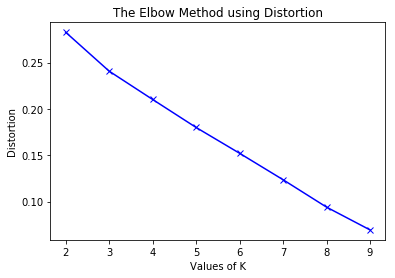

In [127]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

It is not obvious what the optimal K is. Let's try with a different evaluator

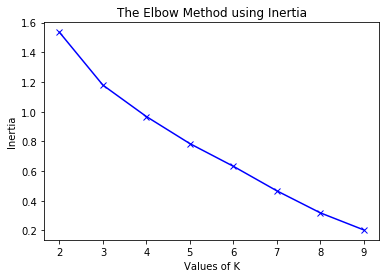

In [128]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

Observing the two plots above, we can say that **k=3** is the optimal groupings for our data.

In [134]:
kmeanModel = KMeans(n_clusters=3).fit(borough_mean)  

In [135]:
kmeanModel.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

In [136]:
borough.insert(0, 'Cluster Labels', kmeanModel.labels_)

In [137]:
borough

,Cluster Labels,Borough,Athletics & Sports,Bakery,Bank,Baseball Field,Bike Rental / Bike Share,Bike Trail,Boat or Ferry,Burger Joint,...,Sushi Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Shop,Women's Store
0,0,Bronx,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,Brooklyn,0.000000,0.037037,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,Manhattan,0.064516,0.000000,0.000000,0.225806,0.032258,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,Queens,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2,Staten Island,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0,Central Toronto,0.000000,0.000000,0.013514,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013514,0.013514,0.013514,0.027027,0.000000,0.013514,0.013514,0.013514,0.000000,0.013514
1,0,Downtown Toronto,0.000000,0.000000,0.010417,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010417,0.020833,0.010417,0.010417,0.000000,0.000000,0.010417,0.010417,0.000000,0.010417
2,0,East Toronto,0.000000,0.000000,0.013514,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013514,0.013514,0.013514,0.027027,0.000000,0.013514,0.013514,0.013514,0.000000,0.013514
3,0,East York,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,Etobicoke,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Let's visualize the outcome and observe the distribution of clusters

In [164]:
borough = borough.join(neighborhoods_location.set_index('Borough'), on='Borough')
borough

,Cluster Labels,Borough,Athletics & Sports,Bakery,Bank,Baseball Field,Bike Rental / Bike Share,Bike Trail,Boat or Ferry,Burger Joint,...,Tea Room,Thai Restaurant,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Shop,Women's Store,Latitude,Longitude
0,0,Bronx,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.846651,-73.878594
1,0,Brooklyn,0.000000,0.037037,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.650104,-73.949582
2,0,Manhattan,0.064516,0.000000,0.000000,0.225806,0.032258,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.789624,-73.959894
3,0,Queens,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.749824,-73.797634
4,2,Staten Island,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.583456,-74.149605
0,0,Central Toronto,0.000000,0.000000,0.013514,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013514,0.027027,0.000000,0.013514,0.013514,0.013514,0.000000,0.013514,43.653482,-79.383935
1,0,Downtown Toronto,0.000000,0.000000,0.010417,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010417,0.010417,0.000000,0.000000,0.010417,0.010417,0.000000,0.010417,43.654174,-79.380812
2,0,East Toronto,0.000000,0.000000,0.013514,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013514,0.027027,0.000000,0.013514,0.013514,0.013514,0.000000,0.013514,43.653482,-79.383935
3,0,East York,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.699971,-79.332520
4,0,Etobicoke,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.643556,-79.565633


In [169]:
# create map
map_clusters = folium.Map(location=[43.111, -76.825], zoom_start=7)

# set color scheme for the clusters
x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(borough['Latitude'], borough['Longitude'], borough['Borough'], borough['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results and Discussion <a name="Results and Discussion"></a>

In this study, we analyze 15 boroughs from New York and Toronto by evaluating different venues in each borough. We then cluster these boroughs into 3 clusters and determind their smiliarity using KMeans algorithms. From the results, we can see that there are 12 out of 15 boroughs are actually very similar to each other and the only borough that stands out are Misissauga and Staten Island. This result is not suprising as Mississauga and Staten Island are both very far away from the downtown area in both cities. We also noticed that Misissauga and Staten Island are very different from each other in terms of the types of venues in both boroughs. Overall, this study has shown that New York is extermely similar to Toronto in terms of venues. 

## Conclusion <a name="Analysis"></a>

In conclusion, this study has shown that New York and Toronto are two very similar cities. For people who constantly travel between these two cities, they should not experience too much difference in terms of their access to different types of venues in the majority parts of both cities except in Mississauga and Staten Island.